In [1]:
### Import Data

import pandas as pd # Import pandas package
import numpy as np

data = pd.read_csv('files/train_data.csv') # Import
data.head() #check the first 5 rows

,total_rooms,population,median_income,median_house_value
0,7052,2197,3.7252,167100
1,4323,1479,6.0758,226800
2,4799,2554,2.6582,122800
3,3490,2818,2.8977,126200
4,1810,1257,3.8355,111700


##### Understanding the data and variables

 - We have 5 variables - total_rooms, population, median_income, median_house_value
 - median_income & median_house_value are continuous and total_rooms & population are discrete in nature
 
 - Logical check - Missing value check, Outlier check, data anomalies
     - Missing value - No Missing values (If there is any missing value in any dataset, we can impute by mean/median or remove the varialble in case of too many missing values)
     - Data Anomalies - Data is fine. There are no negative values in any variables
 - Identifying dependent and Independent variables
     - As mentioned in the problem, we have to predict average price in an area. So dependent variable is "Median_house_value"
     - Independent variables - total_rooms, population, median_income

In [3]:
# Missing value check

data.apply(lambda x : sum(x.isnull()))

total_rooms           0
population            0
median_income         0
median_house_value    0
dtype: int64

In [4]:
# Data Anomalies

data.describe() # This helps to get an idea of the count , range, mean, distribution

,total_rooms,population,median_income,median_house_value
count,10749.000000,10749.000000,10749.000000,10749.000000
mean,2550.285701,1452.268862,3.836851,203156.478277
std,2096.456626,1132.285951,1.889396,113127.641457
min,2.000000,3.000000,0.499900,14999.000000
25%,1434.000000,810.000000,2.536300,119800.000000
50%,2066.000000,1193.000000,3.494000,178400.000000
75%,3042.000000,1751.000000,4.707100,253500.000000
max,37937.000000,28566.000000,15.000100,500001.000000


##### Outlier check
<br> An outlier is an observation which deviates so much from other observations as to arouse suspicions that it was generated  by a different mechanism. (Unusual / Extreme values)

<br> How to identify :
 - Scatter plot
 - Box plot
 - Mean +- 2sigma

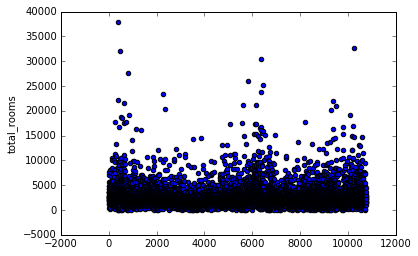

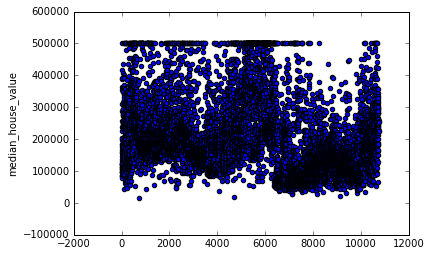

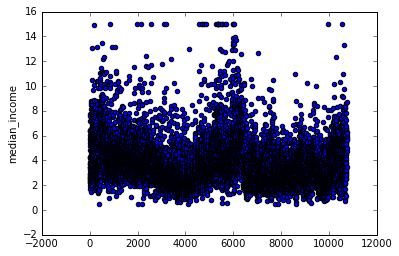

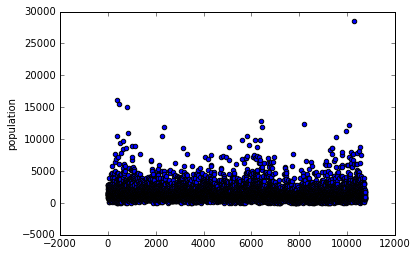

In [5]:
# Scatter plot of all variables 

import matplotlib.pyplot as plt
from matplotlib import interactive
%matplotlib inline

plt.scatter(data.index, data.total_rooms)
plt.ylabel("total_rooms")
interactive(True)
plt.show()

plt.scatter(data.index, data.median_house_value)
plt.ylabel("median_house_value")
plt.show()

plt.scatter(data.index, data.median_income)
plt.ylabel("median_income")
plt.show()

plt.scatter(data.index, data.population)
plt.ylabel("population")
plt.show()

#Visually we can infer there are some extreme values in 'total rooms' , 'population' and 'income'.

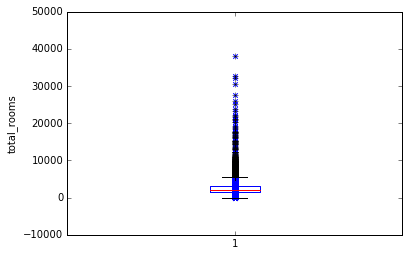

In [6]:
# Box plot
box1 = plt.boxplot(data['total_rooms'])
plt.scatter(np.ones_like(data['total_rooms']),     data['total_rooms'],     marker='x', label='all')
interactive(True)
plt.ylabel("total_rooms")
plt.show()

In [7]:
# Let us identify numerically and find out which are the outliers

# Box plot

def box_index(ser):
    Q1 = np.percentile(ser,25)
    Q3 = np.percentile(ser,75)
    IQR = Q3 - Q1
    
    print('High value outlier index: ',ser[ser > (Q3 + 1.5*IQR)].index)
    print('Low value outlier index: ',ser[ser < (Q1 - 1.5*IQR)].index)
    print('total outliers : ' + str(len(ser[ser > (Q3 + 1.5*IQR)].index) + len(ser[ser < (Q1 - 1.5*IQR)].index)))
    
box_index(data['total_rooms'])

High value outlier index:  Int64Index([    0,    15,    17,    39,    40,    80,    84,    88,    92,
               93,
            ...
            10632, 10642, 10643, 10644, 10681, 10683, 10697, 10699, 10728,
            10732],
           dtype='int64', length=682)
Low value outlier index:  Int64Index([], dtype='int64')
total outliers : 682


In [8]:
# Mean +- 2sigma

# How much outlier to identify depends on the alpha level - 1*sigma / 2*sigma / 3*sigma
# function to calculate outlier of a variable
def out1(x):
    mu = np.average(x)
    sigma = np.std(x)
    LL = mu - 2*sigma # Lower limit 
    UL = mu + 2*sigma # Upper limit
    out = [1 if (a >= UL) | (a <= LL) else 0 for a in x]
    return(sum(out))

# check #outliers in each variable
data.apply(out1)


total_rooms           391
population            399
median_income         451
median_house_value    721
dtype: int64

In [9]:
# Percentile Method
# How much outlier to identify depends on the percentile value
# the below example is only for high value outliers
# For low value outliers, cutoff will be (100 - below given percentile value)

del X_data1
X_data1 = data.copy()
def out1(df, cutoff):
    df1 = df
    for i in df1.columns.values:
        perc = np.percentile(df1[i],cutoff)
        df1[i] = [1 if (a >= perc) else 0 for a in df1[i]]
    return(df1)

out1(X_data1, 99).apply(sum)

total_rooms           108
population            108
median_income         108
median_house_value    486
dtype: int64

In [10]:
data.corr()

# Here we can see, income is a good variable to predict house price.
# Population is negatively correlated with house price but the strength of relation is very low.
# Population and total rooms has a high correlation, so we can drop one of the variable.

,total_rooms,population,median_income,median_house_value
total_rooms,1.000000,0.85289,0.226200,0.170415
population,0.852890,1.00000,-0.001600,-0.007810
median_income,0.226200,-0.00160,1.000000,0.685173
median_house_value,0.170415,-0.00781,0.685173,1.000000


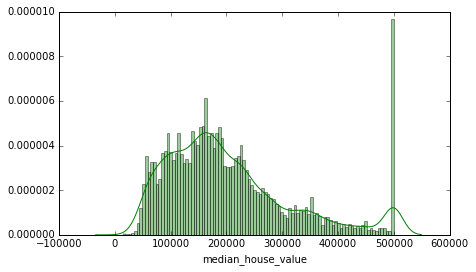

In [11]:
### Normal Distribution check
import seaborn as sns
# Histogram

plt.figure(figsize=(7, 4))
sns.distplot(data['median_house_value'], color='g', bins=100, hist_kws={'alpha': 0.4})

In [12]:
# Shapiro Wilk test
# P-value is less than 0.05 so it confirms data is not normally distributed

import scipy
from scipy import stats
np.random.seed(12345678)
stats.shapiro(data['median_house_value'])
#stats.shapiro(logY)

C:\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1310: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9083019495010376, 0.0)

In [13]:
# Box-cox transformation

bx = scipy.stats.boxcox(data['median_house_value'], lmbda=None, alpha=None)
print(bx)
# This gives us the transformed value and also the lambda value

#store the transformed value in a new variable
YT = bx[0]

(array([ 30.00479724,  31.5735192 ,  28.48679132, ...,  31.5735192 ,
        31.55036465,  32.19473597]), 0.13433477126691296)


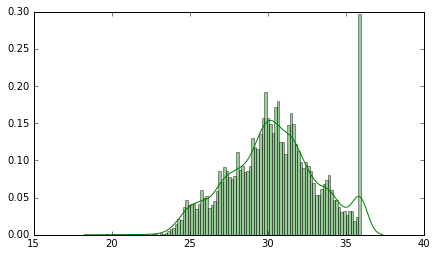

In [14]:
plt.figure(figsize=(7, 4))
sns.distplot(YT, color='g', bins=100, hist_kws={'alpha': 0.4})

In [15]:
# Split the data into 3 sets - train, validation and test
# Here the data is cross section , so we can do out of sample validation
# We will split in the ration 72-18-10 %
import sklearn
from sklearn.model_selection import train_test_split

nrow = len(data)
X_train, X_test = sklearn.model_selection.train_test_split(data.iloc[:,:-1],test_size=int(nrow*0.1),random_state=1)
X_train, X_val = sklearn.model_selection.train_test_split(X_train,test_size=int(nrow*0.2),random_state=1)

Y_train, Y_test = sklearn.model_selection.train_test_split(YT,test_size=int(nrow*0.1),random_state=1)
Y_train, Y_val
= sklearn.model_selection.train_test_split(Y_train,test_size=int(nrow*0.2),random_state=1)

### Now we will run our first version of model

import statsmodels.api as sm

# OLS regression
est = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
print(est.summary())

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     1982.
Date:                Tue, 05 Jun 2018   Prob (F-statistic):               0.00
Time:                        13:50:54   Log-Likelihood:                -16390.
No. Observations:                7526   AIC:                         3.279e+04
Df Residuals:                    7522   BIC:                         3.282e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            26.4415      0.066    398.402

In [16]:
### Function to return the original data from transformed data

def ori_from_bc(x,lmb):
    return(pow(x*lmb+1,1/lmb))

est = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Train the model using the training sets
#regr.fit(X_train, Y_train)

# Make predictions using the validation set
Y_pred = ori_from_bc(est.predict(sm.add_constant(X_val)),0.1343)
Y_pred1 = ori_from_bc(est.predict(),0.1343)

In [17]:
# MAPE - Mean Absolute Percentage Error - It helps to check the error% we have in our prediction

# check MAPE (on the validation set)

def mape1(act,pred):
    x = np.abs(1-pred/act)*100
    return(round(np.mean(x),2))

print("Training MAPE is : " + str(mape1(ori_from_bc(Y_train,0.1343),Y_pred1)) + "%")
print("Validation MAPE is : " + str(mape1(ori_from_bc(Y_val,0.1343),Y_pred)) + "%")

Training MAPE is : 35.42%
Validation MAPE is : 37.39%


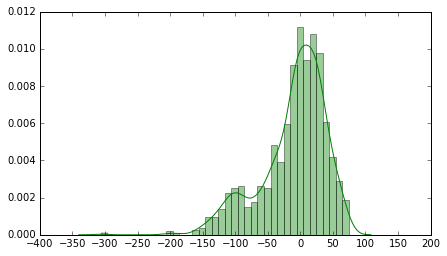

In [18]:
### We have high training and Validation MAPE
import matplotlib.ticker as ticker
err = (ori_from_bc(Y_val,0.1343) - Y_pred)/ori_from_bc(Y_val,0.1343)*100

# Error distribution using histogram
plt.figure(figsize=(7, 4))
ax = sns.distplot(err, color='g', bins=38, hist_kws={'alpha': 0.4},hist=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
plt.show()

In [19]:
### VIF Check
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(X_train.columns)
print(vif)

# Remove population
X_train2 = X_train.iloc[:,[0,2]]
X_val2 = X_val.iloc[:,[0,2]]
X_test2 = X_test.iloc[:,[0,2]]

vif = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
print(X_train2.columns)
print(vif)

Index(['total_rooms', 'population', 'median_income'], dtype='object')
[10.223567845872985, 8.7744606881335034, 2.3069613335361328]
Index(['total_rooms', 'median_income'], dtype='object')
[2.3057975888848294, 2.3057975888848294]


In [20]:
# Check Mape

# Train the model using the training sets
est = sm.OLS(Y_train, sm.add_constant(X_train2)).fit()

# Make predictions using the validation set
Y_pred = ori_from_bc(est.predict(sm.add_constant(X_val2)),0.1343)
Y_pred1 = ori_from_bc(est.predict(),0.1343)

err = (ori_from_bc(Y_val,0.1343) - Y_pred)/ori_from_bc(Y_val,0.1343)*100
errt = (ori_from_bc(Y_train,0.1343) - Y_pred1)/ori_from_bc(Y_train,0.1343)*100

print("Training MAPE is : " + str(mape1(ori_from_bc(Y_train,0.1343),Y_pred1)) + "%")
print("Validation MAPE is : " + str(mape1(ori_from_bc(Y_val,0.1343),Y_pred)) + "%")

Training MAPE is : 35.4%
Validation MAPE is : 37.36%


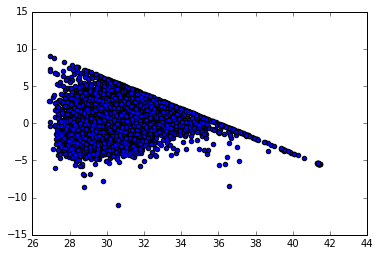

In [21]:
### Heteroscedasticity Check

# OLS regression
est = sm.OLS(Y_train, sm.add_constant(X_train2)).fit()
resid = est.resid

plt.scatter(est.predict(), resid)

### The plot shows the presence of heterosceadsticity
### We can treat outliers and check again

In [22]:
### Mean +- 2sigma on residuals

err_out = [False if (x > err.mean() + 1.96*err.std()) | (x < err.mean() - 1.96*err.std()) else True for x in errt]

#get index of outliers
out_index = np.where(err_out)[0]

### Y outliers (percentile method)

y_out = [False if (x > np.percentile(Y_train,90)) | (x < np.percentile(Y_train,10)) else True for x in Y_train]
#get index of outliers
yout_index = np.where(y_out)[0]

In [23]:
### Remove residual outliers from train and run regression again

# Train the model using the training sets
est = sm.OLS(Y_train[out_index], sm.add_constant(X_train2.iloc[out_index,:])).fit()

# Make predictions using the validation set
Y_pred = ori_from_bc(est.predict(sm.add_constant(X_val2)),0.1343)
Y_pred1 = ori_from_bc(est.predict(),0.1343)

print("Training MAPE is : " + str(mape1(ori_from_bc(Y_train[out_index],0.1343),Y_pred1)) + "%")
print("Validation MAPE is : " + str(mape1(ori_from_bc(Y_val,0.1343),Y_pred)) + "%")

Training MAPE is : 30.99%
Validation MAPE is : 39.44%


In [24]:
# OLS regression
est = sm.OLS(Y_train[out_index], sm.add_constant(X_train2.iloc[out_index,:])).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     2957.
Date:                Tue, 05 Jun 2018   Prob (F-statistic):               0.00
Time:                        13:51:08   Log-Likelihood:                -14907.
No. Observations:                7141   AIC:                         2.982e+04
Df Residuals:                    7138   BIC:                         2.984e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            26.7732      0.057    469.594

In [25]:
# Cook's Distance

inf = est.get_influence()
cd = inf.cooks_distance
cd = list(cd[0])
inf_cutoff = 4/(7138) #4/(n-k-1)
#inf_cutoff = 0.002 #4/(n-k-1)

# There are 429 influenntial obs
out = [1 if x > inf_cutoff else 0 for x in cd]
sum(out)

223

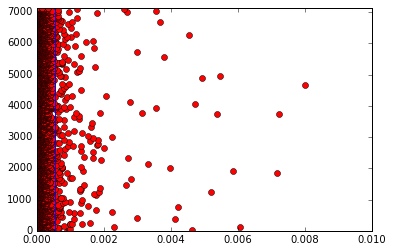

In [27]:
### get index of non outliers
cook_index = np.where(np.array(out)==0)[0]

plt.plot(cd, range(0,len(cd)), 'ro')
plt.axis([0, 0.01, 0, len(cd)])
plt.plot(np.repeat(inf_cutoff,len(cd)), range(0,len(cd)), '-')

In [28]:
# Check Mape

# Train the model using the training sets
est = sm.OLS(Y_train[cook_index], sm.add_constant(X_train2.iloc[cook_index,:])).fit()

# Make predictions using the validation set
Y_pred = ori_from_bc(est.predict(sm.add_constant(X_val2)),0.1343)
Y_pred1 = ori_from_bc(est.predict(),0.1343)

print("Training MAPE is : " + str(mape1(ori_from_bc(Y_train[cook_index],0.1343),Y_pred1)) + "%")
print("Validation MAPE is : " + str(mape1(ori_from_bc(Y_val,0.1343),Y_pred)) + "%")

Training MAPE is : 35.47%
Validation MAPE is : 37.36%


In [29]:
# check test accuracy

# Train the model using the training sets
est = sm.OLS(Y_train[cook_index], sm.add_constant(X_train2.iloc[cook_index,:])).fit()

# Make predictions using the validation set
Y_pred = ori_from_bc(est.predict(sm.add_constant(X_test2)),0.1343)

print("Test MAPE is : " + str(mape1(ori_from_bc(Y_test,0.1343),Y_pred)) + "%")

Test MAPE is : 34.9%


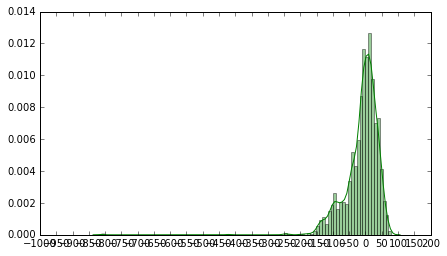

In [30]:
# Though we have high MAPE, we can check the error distribution 
# so that we can identifiy if there are outlier values that are causing high MAPE.
# Here we can see mostly error lies in -30% to +30% Range

err = (ori_from_bc(Y_test,0.1343) - Y_pred)/ori_from_bc(Y_test,0.1343)*100

# Error distribution using histogram
plt.figure(figsize=(7, 4))
ax = sns.distplot(err, color='g', bins=100, hist_kws={'alpha': 0.4},hist=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
plt.show()